# Machine Learning Unsupervised


## Clustering on a breast cancer dataset

In this exercise, we will perform clustering on a set which contains samples that are diagnosed with breast cancer (malignant samples) and samples that are healthy (benign samples). We will use dimensionality reduction techniques and clustering techniques as discussed in ML chapter 8 and the syllabus on Cluster Analysis.

__Goal:__
The purpose of this notebook is to learn how to use several unsupervised learning algorithms using sklearn.   

__At the end of this notebook you will be able to:__
> 1. Run a K-means, DBSCAN, HAC and spectral algorithm.
> 2. Understand how you can configure the algorithm.
> 3. Know how to determine the optimal number of clusters.
> 4. Understand how you can evaluate the performance of the algorithms.
> 5. Know the advantages and disadvantages of the algorithms.



## The dataset
The data can be downloaded here: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data. For a description of the data, see here: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data. We have the labels for the samples, so we can use this data set to evaluate clustering algorithms.



In [97]:
from itertools import permutations

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load and inspect the data

1. Load the data
2. Inspect the data.
    - How many samples are classified as Benign, and how many as Malignant?
    - What features are there? What do the column names mean?
    - Are there missing values?
    - Can all features be used or do we have to throw some away?
    - How are the features distributed

3. Make the data set ready for clustering. Remember to remove the diagnosis-column, as this should not be input for clustering. However, this data must be stored separately so it can be used for performance evaluation of the clustering.

In [6]:
#your solution here
df = pd.read_csv('data/breast_cancer.csv').set_index('id')
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [5]:
df.tail(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
df.isna().sum().sum()

0

In [20]:
df.drop(columns=['diagnosis']).var().min(), df.drop(columns=['diagnosis']).var().max()

(7.001691562872344e-06, 324167.3851021686)

**Conclusion**:
- Diagnosis:
    - 357 tumours are benign.
    - 212 tumours are malignant.
    - therefore it is an unbalanced dataset.
- There are NO missing values.
- Columns:
    - Several measurement characteristics of each cell nucleus.
        - the mean
        - the standard error
        - worst is the mean of the three largest values.
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)
- Scale:
    - data is on a different scale and should be standardized for PCA for instance.

## Dimensionality reduction - PCA

We want to reduce the dimension of the dataset first. We start by using PCA. Usually, the first two principal components are used to plot and inspect the shape of the data. Sometimes also inspecting the next few principal components give insight in variance of the data. For this, also the explained variance per component must be taken into account. 

We consider PCA here for two reasons:
1. Find out whether this is a good visualization for the dataset.
2. Find out whether using the first few principal components for clustering is a good alternative for doing clustering on the original (high-dimensional) data set.

Make a plot of PC1 vs PC2, colored by the actual diagnosis of each sample. Is this a good visualization?

In [79]:
def scree_plot(pca: PCA):
    x = np.arange(pca.n_components_) + 1
    
    plt.plot(x, pca.explained_variance_ratio_, 'o-', color='blue')
    plt.title('Scree Plot')
    plt.xlabel('Principal component')
    plt.ylabel('Explained variance')
    
    plt.show()
    
def component_plot(pca_comp1, pca_comp2, y, title):
    pc1, xlabel = pca_comp1
    pc2, ylabel = pca_comp2
    
    plot = sns.scatterplot(x=pc1, y=pc2, hue=y, alpha=0.5)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
   
    return plot

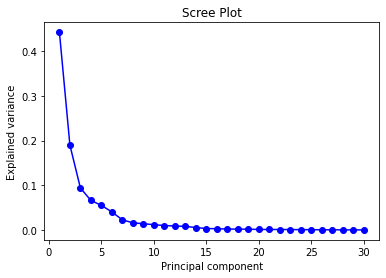

In [27]:
#your solution here
X = df.drop(columns='diagnosis')
y = df['diagnosis']

# scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Need scree plot first
pca = PCA()
pca.fit(X_scaled)

scree_plot(pca)

In [32]:
# The elbow starts at around 3 components. 
# This explains 72% of the variance. 
# However, it is important to get more variance. The first 5 add explain 84%
pca.explained_variance_ratio_[:5].sum()

0.8473427431680723

In [47]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

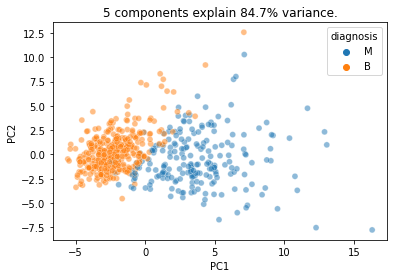

In [65]:
title = '5 components explain 84.7% variance.'
component_plot((X_pca[:, 0], 'PC1'), (X_pca[:, 1], 'PC2'), y, title=title)

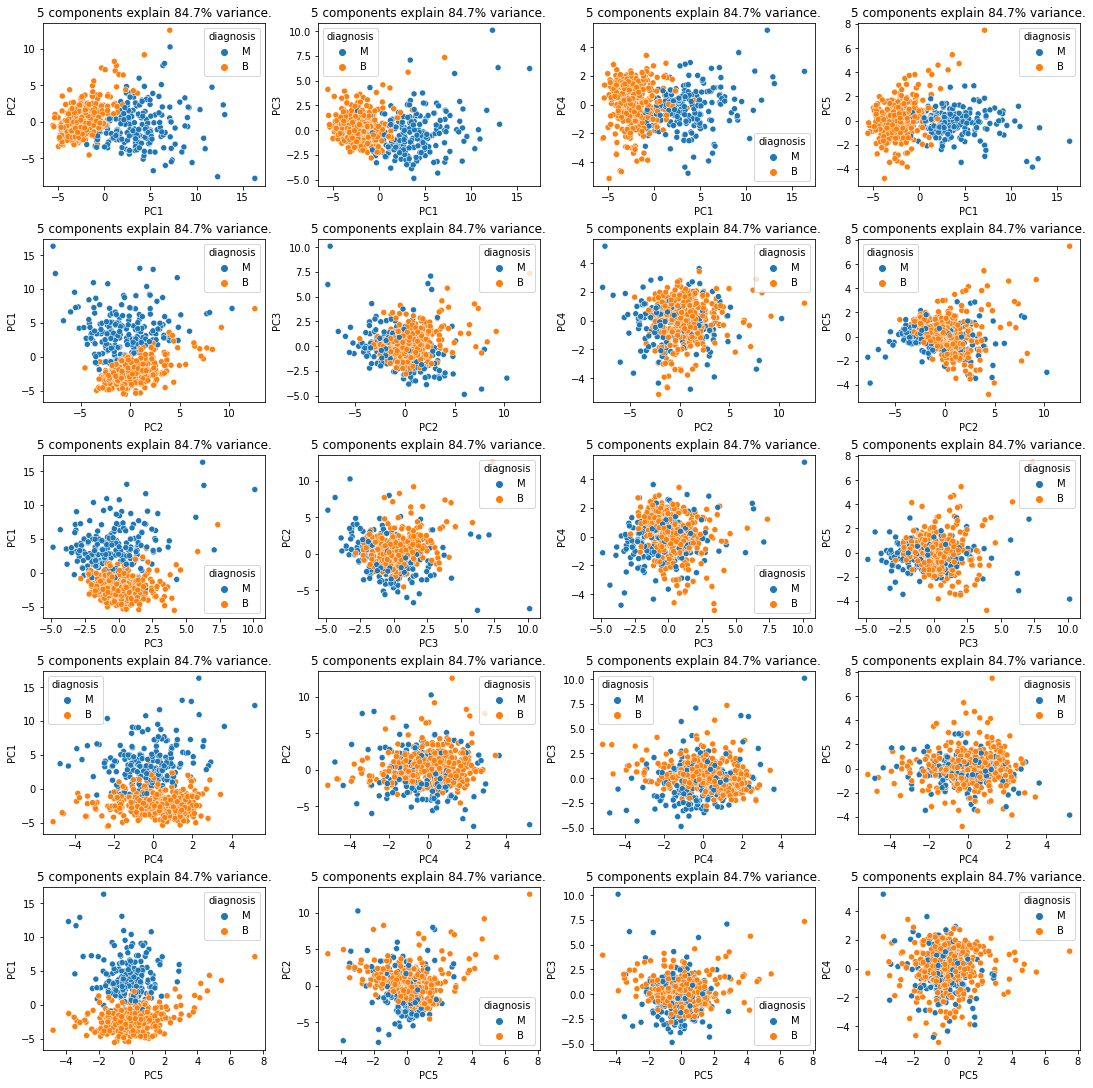

In [96]:
perm = permutations([(0, 'PC1'), (1, 'PC2'), (2, 'PC3'), (3, 'PC4'), (4, 'PC5')], 2)

fig, axs = plt.subplots(5, 4, figsize=(15, 15), constrained_layout=True)

for p, ax in zip(perm, axs.flatten()):
    pcs1, pcs2 = p
    pcx, xlabel = pcs1
    pcy, ylabel = pcs2
    
    sns.scatterplot(x=X_pca[:, pcx], y=X_pca[:, pcy], hue=y, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

I think it's a good visualization. However, some scatterplots do not show clear clusters.

## tSNE

Next, we'll try tSNE on the dataset.
1. Run TSNE with default perplexity on the data set. Run tSNE several times. Does tSNE always give the same results when the parameters are held the same?
2. Vary the perplexity parameter and compare the results.
3. Color the plot by the diagnosis of each point. Pick a nice result to work with in the following exercises. 

 

In [153]:
#your solution here
scaler = StandardScaler()

#Creating a 2D visualization to visualize the clusters
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(scaler.fit_transform(X_vals))

/homes/ddlatumalea/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/homes/ddlatumalea/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.045s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.053093
[t-SNE] KL divergence after 2300 iterations: 0.898221


In [154]:
df['diagnosis'].reset_index(drop=True).map({'M':0, 'B':1})

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

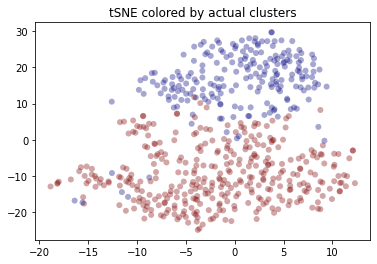

In [155]:
plt.scatter(Y[:,0],Y[:,1], c=df['diagnosis'].reset_index(drop=True).map({'M':0, 'B':1}),  cmap = "jet", edgecolor = "None", alpha=0.35)
plt.title('tSNE colored by actual clusters')
plt.show()

## Next steps

We will do the following two things in the rest of this notebook:

1. Assuming that there are two clusters (a cluster for benign and a cluster for malignant samples), see which clustering algorithm performs best given the ground truth. 
2. It looks a bit like the malignant separate into two clusters, bringing the total number of clusters to 3. Can we find evidence that this is the right cluster, or maybe even find significant differences between the two malignant clusters?

We start with 1. Note that, while tSNE is itself quite good in separating clusters, the clustering is usually done in high-dimensional space (so, on the original data set X, rather than on the dimensionally reduced data set Y), and tSNE is only used as a visualization method.


## K-means clustering
Perform the following steps using KMeans and n_clusters = 2. 
1. Perform K-means clustering on X, that is, the original (scaled) dataset.
2. Perform K-means on the result of tSNE.
3. Perform K-means on the dataset consisting of PC1 and PC2.
4. Perform K-means on the dataset consisting of PC2 and PC3.
5. Compare the results of step 1-4 to the ground truth. What do you see? Is the dataset of PC1 and PC2 a good representative of the whole dataset (in terms of clustering)? What about the tSNE dataset? Or the dataset consisting of PC2 and PC3? How do you explain your observations?


In [114]:
#your solution here
X_vals = X.values

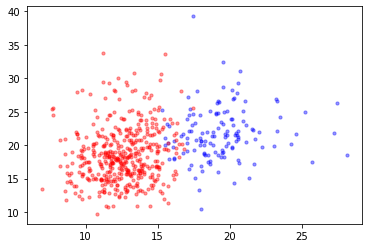

In [115]:
# implementing 1, assuming two clusters and comparing ground truth
k = 2 
km = KMeans(n_clusters=k)
km.fit(X_vals)

color = 'br'

for i in range(k):
    plt.scatter(X_vals[km.labels_ == i, 0], X_vals[km.labels_ == i, 1], c=color[i], alpha=0.4, s=10)
    

In [116]:
# 2) tsne

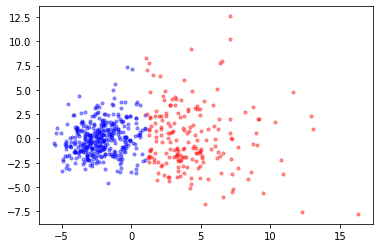

In [121]:
# 3) pc1, pc2
k = 2
km = KMeans(n_clusters=k)
km.fit(X_pca[:, :2])

for i in range(k):
    plt.scatter(X_pca[km.labels_ == i, 0], X_pca[km.labels_ == i, 1], c=color[i], alpha=0.4, s=10)


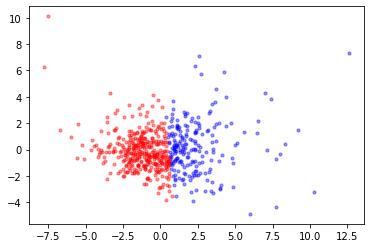

In [124]:
# 4) pc2, pc3
k = 2
km = KMeans(n_clusters=k)
km.fit(X_pca[:, 1:3])

for i in range(k):
    plt.scatter(X_pca[km.labels_ == i, 1], X_pca[km.labels_ == i, 2], c=color[i], alpha=0.4, s=10)


# Evaluate the clustering

Next we compute the adjusted rand index (ARI) for the clustering on X. Basically we compare the cluster outcome with the real outcome

In [133]:
# ARI
from sklearn import metrics
from sklearn import cluster


kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
scaler = StandardScaler()


kY = kmns.fit_predict(scaler.fit_transform(X_vals))

metrics.adjusted_rand_score(kY, y)


/homes/ddlatumalea/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


0.6536246043910179

## Other clustering techniques

Use other clustering techniques and see if you can improve on the ARI.

1. Perform **spectral clustering** on X and visualize the clustering results on the tSNE-result. Try different parameter settings untill a proper clustering is found, and compute the ARI. 
2. Perform **hierarchical** on X and visualize the clustering results on the tSNE-result. Try different parameter settings untill a proper clustering is found, and compute the ARI. 
3. Perform **DBSCAN** on X and visualize the clustering results on the tSNE-result. Try different parameter settings untill a proper clustering is found, and compute the ARI. 


## Evaluation
Based on the results, which algorithm performs the best?

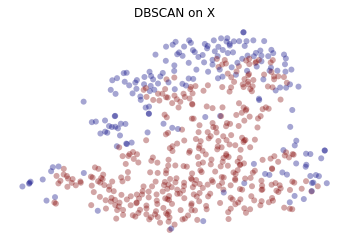

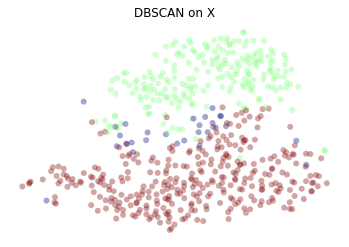

NameError: name 'principalDf' is not defined

In [160]:
#your solution here
from sklearn.cluster import DBSCAN

X = StandardScaler().fit_transform(X.values)

dbsc = DBSCAN(eps=2.8, min_samples=10)
kY = dbsc.fit_predict(X)

plt.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
plt.title('DBSCAN on X')
plt.axis('off')
plt.show()

dbsc = cluster.DBSCAN(eps=0.33, min_samples=27, metric='cosine')
kY = dbsc.fit_predict(X)

plt.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
plt.title('DBSCAN on X')
plt.axis('off')
plt.show()



dbsc = cluster.DBSCAN(eps=0.25, min_samples=25, metric='euclidean')
kY = dbsc.fit_predict(principalDf.iloc[:,0:1])

plt.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
plt.title('DBSCAN on X')
plt.axis('off')
plt.show()


metrics.adjusted_rand_score(kY, datas['diagnosis'])


## Two or three clusters?

Suppose we had no knowledge about the diagnosis and we didn't know that there are only two options (B and M). How many clusters would we choose?

1. Use the elbow method to see if this shows wheter we should use two or three clusters. 
2. Try the clustering methods as used before, but now try to create three clusters. Does this looks plausible?
3. If you were convinced that there are three clusters instead of two, what could be done to support this hypothesis?



### Solution

Some examples/literature

http://www.sthda.com/english/articles/29-cluster-validation-essentials/96-determining-the-optimal-number-of-clusters-3-must-know-methods/
Elbow method, silhouette method, gap statistic

Gap statistic in python: https://anaconda.org/milesgranger/gap-statistic/notebook
Interpret gap statistic: https://stats.stackexchange.com/questions/95290/how-should-i-interpret-gap-statistic

For n_clusters = 2 The average silhouette_score is : 0.34497400510344084


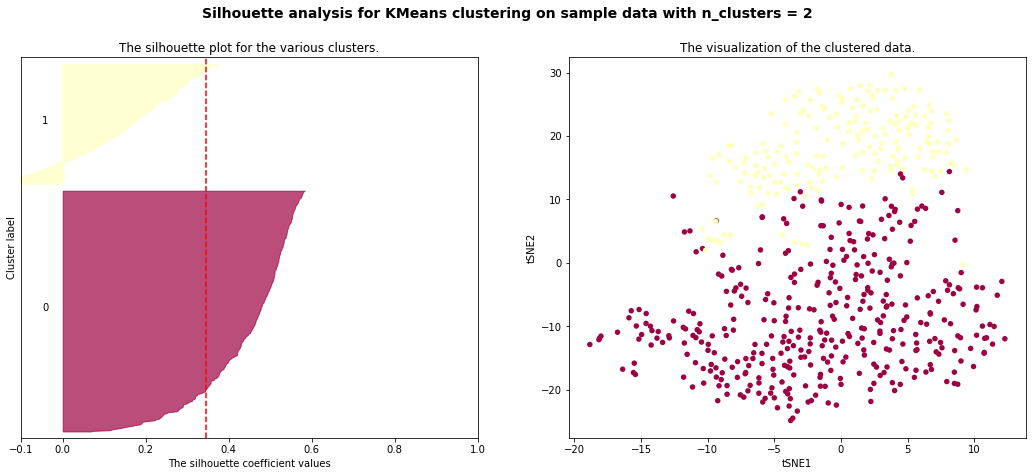

For n_clusters = 3 The average silhouette_score is : 0.3143840098608098


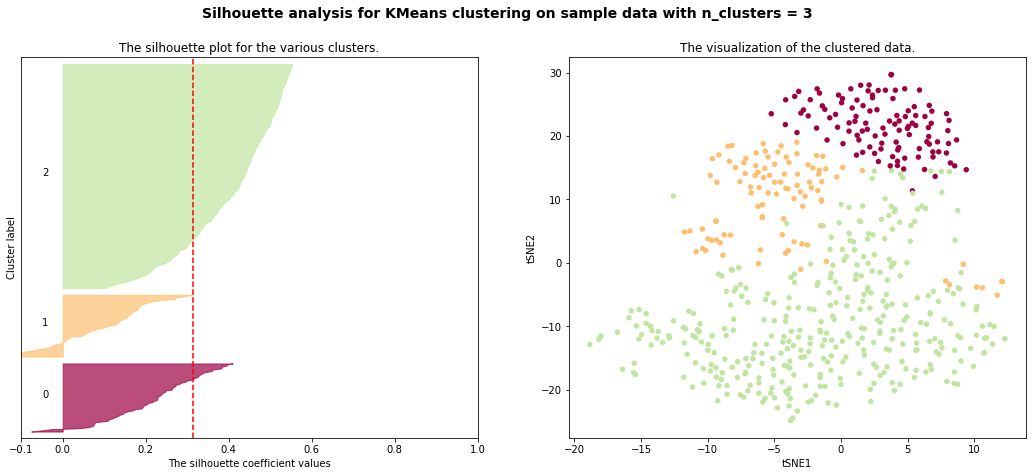

For n_clusters = 4 The average silhouette_score is : 0.27998963703382607


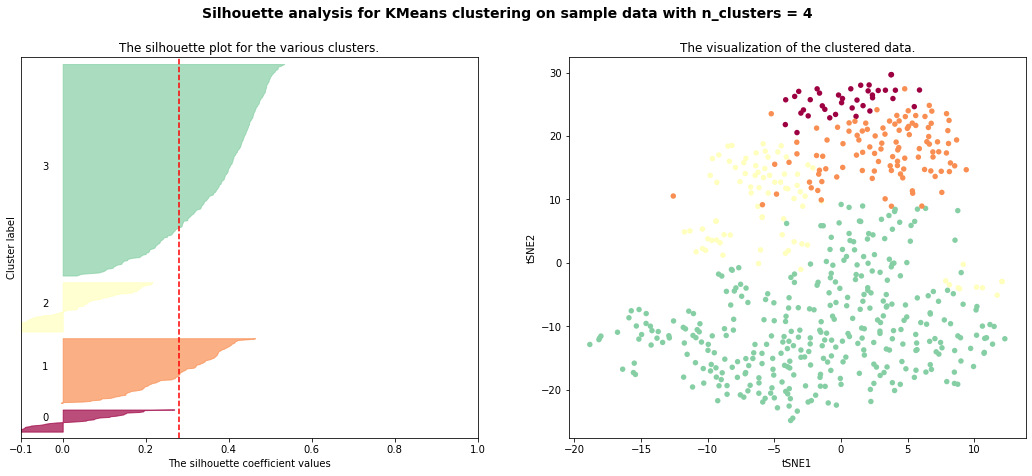

In [164]:
# The silhouette method suggests k=2

from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm
cmap = cm.get_cmap("Spectral")


range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Y[:, 0], Y[:, 1], s=30, lw=0,
                c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("tSNE1")
    ax2.set_ylabel("tSNE2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show() 

In [224]:
# Gap statistic does not yield clear answer, also suggests 2 or 3

def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal
    